# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

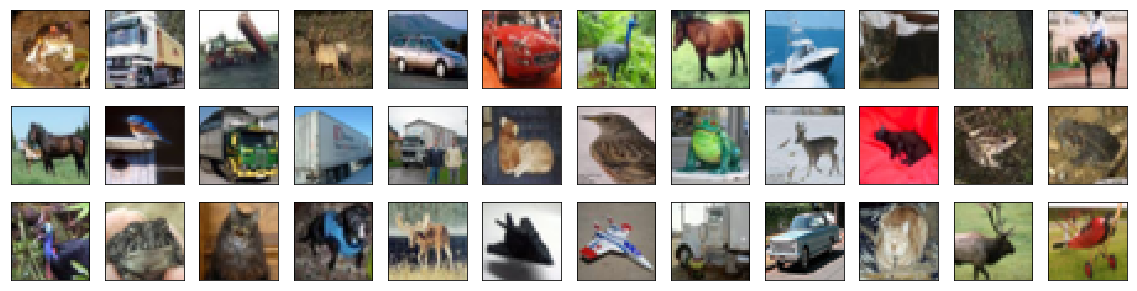

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 14s - loss: 1.5828 - acc: 0.4279 - val_loss: 1.2991 - val_acc: 0.5304

Epoch 00001: val_loss improved from inf to 1.29913, saving model to model.weights.best.hdf5
Epoch 2/100
 - 6s - loss: 1.2625 - acc: 0.5498 - val_loss: 1.1649 - val_acc: 0.6046

Epoch 00002: val_loss improved from 1.29913 to 1.16488, saving model to model.weights.best.hdf5
Epoch 3/100
 - 6s - loss: 1.1474 - acc: 0.5948 - val_loss: 1.0574 - val_acc: 0.6268

Epoch 00003: val_loss improved from 1.16488 to 1.05740, saving model to model.weights.best.hdf5
Epoch 4/100
 - 7s - loss: 1.0809 - acc: 0.6193 - val_loss: 1.0464 - val_acc: 0.6390

Epoch 00004: val_loss improved from 1.05740 to 1.04644, saving model to model.weights.best.hdf5
Epoch 5/100
 - 7s - loss: 1.0431 - acc: 0.6328 - val_loss: 1.1304 - val_acc: 0.6112

Epoch 00005: val_loss did not improve from 1.04644
Epoch 6/100
 - 7s - loss: 1.0208 - acc: 0.6487 - val_loss: 1.0188 - val_acc: 0.6650

Epoch 000


Epoch 00058: val_loss did not improve from 0.96233
Epoch 59/100
 - 6s - loss: 1.6235 - acc: 0.4547 - val_loss: 1.5897 - val_acc: 0.4520

Epoch 00059: val_loss did not improve from 0.96233
Epoch 60/100
 - 6s - loss: 1.6188 - acc: 0.4539 - val_loss: 1.9004 - val_acc: 0.3956

Epoch 00060: val_loss did not improve from 0.96233
Epoch 61/100
 - 6s - loss: 1.6447 - acc: 0.4452 - val_loss: 1.3717 - val_acc: 0.5292

Epoch 00061: val_loss did not improve from 0.96233
Epoch 62/100
 - 6s - loss: 1.6556 - acc: 0.4371 - val_loss: 1.3897 - val_acc: 0.5076

Epoch 00062: val_loss did not improve from 0.96233
Epoch 63/100
 - 6s - loss: 1.6589 - acc: 0.4406 - val_loss: 1.7517 - val_acc: 0.3638

Epoch 00063: val_loss did not improve from 0.96233
Epoch 64/100
 - 6s - loss: 1.6673 - acc: 0.4403 - val_loss: 1.7345 - val_acc: 0.4116

Epoch 00064: val_loss did not improve from 0.96233
Epoch 65/100
 - 6s - loss: 1.6649 - acc: 0.4329 - val_loss: 1.5816 - val_acc: 0.4680

Epoch 00065: val_loss did not improve fr

### 8. Load the Model with the Best Validation Accuracy

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6814


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

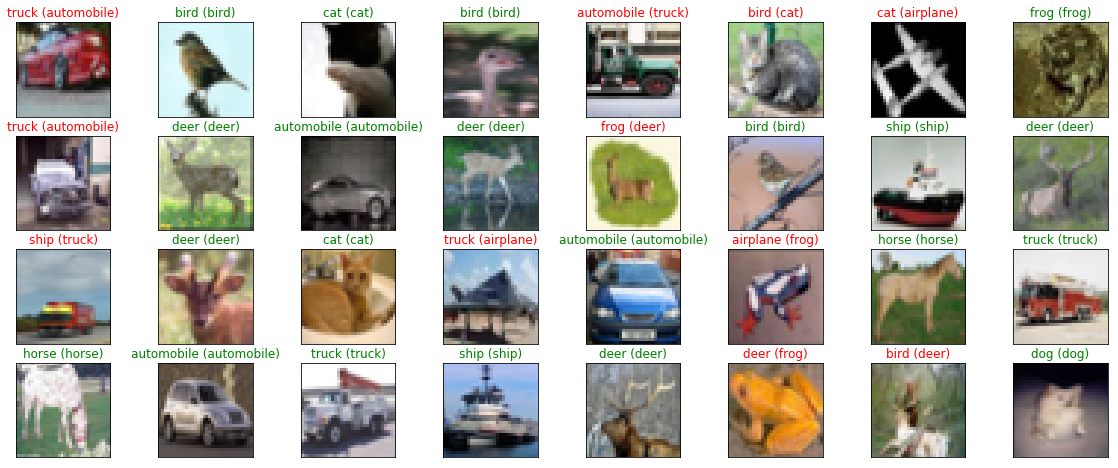

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

---
## My model

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

my_model = Sequential()
my_model.add(Conv2D(filters=32, kernel_size=4, strides=2, 
                    padding='same', activation='relu', 
                    input_shape=(32, 32, 3)))
my_model.add(MaxPooling2D(pool_size=2))
my_model.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                    activation='relu'))
my_model.add(Conv2D(filters=128, kernel_size=2, padding='same', 
                    activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))
my_model.add(Conv2D(filters=256, kernel_size=2, padding='same', 
                    activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Flatten())
my_model.add(Dense(units=500, activation='relu'))
my_model.add(Dropout(0.25))
my_model.add(Dense(units=100, activation='relu'))
my_model.add(Dropout(0.125))
my_model.add(Dense(units=10, activation='softmax'))

my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 16, 16, 32)        1568      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 256)         131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 256)         0         
__________

In [26]:
my_model.compile(loss='categorical_crossentropy', optimizer='adadelta', 
                 metrics=['accuracy'])

In [27]:
from keras.callbacks import ModelCheckpoint   

checkpoint = ModelCheckpoint(filepath='my_model.weights.best.hdf5', 
                             verbose=1, save_best_only=True)
hist = my_model.fit(x_train, y_train, batch_size=32, epochs=100,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[checkpoint], verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 16s 354us/step - loss: 1.7269 - acc: 0.3635 - val_loss: 1.4103 - val_acc: 0.4876

Epoch 00001: val_loss improved from inf to 1.41029, saving model to my_model.weights.best.hdf5
Epoch 2/100
45000/45000 [==============================] - 16s 345us/step - loss: 1.3310 - acc: 0.5200 - val_loss: 1.2734 - val_acc: 0.5612

Epoch 00002: val_loss improved from 1.41029 to 1.27336, saving model to my_model.weights.best.hdf5
Epoch 3/100
45000/45000 [==============================] - 16s 345us/step - loss: 1.1651 - acc: 0.5887 - val_loss: 1.4047 - val_acc: 0.5318

Epoch 00003: val_loss did not improve from 1.27336
Epoch 4/100
45000/45000 [==============================] - 15s 343us/step - loss: 1.0489 - acc: 0.6350 - val_loss: 1.3375 - val_acc: 0.5592

Epoch 00004: val_loss did not improve from 1.27336
Epoch 5/100
45000/45000 [==============================] - 16s 351us/step - loss: 0.9584 - 


Epoch 00041: val_loss did not improve from 0.79362
Epoch 42/100
45000/45000 [==============================] - 16s 345us/step - loss: 0.4730 - acc: 0.8514 - val_loss: 1.2181 - val_acc: 0.7472

Epoch 00042: val_loss did not improve from 0.79362
Epoch 43/100
45000/45000 [==============================] - 15s 340us/step - loss: 0.4818 - acc: 0.8489 - val_loss: 0.8989 - val_acc: 0.7214

Epoch 00043: val_loss did not improve from 0.79362
Epoch 44/100
45000/45000 [==============================] - 15s 341us/step - loss: 0.4750 - acc: 0.8502 - val_loss: 0.9785 - val_acc: 0.7414

Epoch 00044: val_loss did not improve from 0.79362
Epoch 45/100
45000/45000 [==============================] - 16s 348us/step - loss: 0.4785 - acc: 0.8512 - val_loss: 1.0051 - val_acc: 0.7270

Epoch 00045: val_loss did not improve from 0.79362
Epoch 46/100
45000/45000 [==============================] - 16s 345us/step - loss: 0.4885 - acc: 0.8473 - val_loss: 0.9285 - val_acc: 0.7492

Epoch 00046: val_loss did not impr

45000/45000 [==============================] - 15s 340us/step - loss: 0.5713 - acc: 0.8256 - val_loss: 1.1139 - val_acc: 0.7268

Epoch 00084: val_loss did not improve from 0.79362
Epoch 85/100
45000/45000 [==============================] - 15s 339us/step - loss: 0.5797 - acc: 0.8233 - val_loss: 1.2259 - val_acc: 0.7264

Epoch 00085: val_loss did not improve from 0.79362
Epoch 86/100
45000/45000 [==============================] - 15s 338us/step - loss: 0.5892 - acc: 0.8200 - val_loss: 0.9263 - val_acc: 0.7220

Epoch 00086: val_loss did not improve from 0.79362
Epoch 87/100
45000/45000 [==============================] - 15s 338us/step - loss: 0.5910 - acc: 0.8206 - val_loss: 1.6404 - val_acc: 0.7396

Epoch 00087: val_loss did not improve from 0.79362
Epoch 88/100
45000/45000 [==============================] - 15s 339us/step - loss: 0.5970 - acc: 0.8222 - val_loss: 1.0055 - val_acc: 0.6646

Epoch 00088: val_loss did not improve from 0.79362
Epoch 89/100
45000/45000 [======================

In [29]:
my_model.load_weights('my_model.weights.best.hdf5')

In [30]:
score = my_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: {:.4f}'.format(score[1]))

Test accuracy: 0.7390


---
## Another model

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

another_model = Sequential()

another_model.add(Conv2D(filters=32, kernel_size=5, padding='same', 
                    activation='relu', input_shape=(32, 32, 3)))
another_model.add(Conv2D(filters=32, kernel_size=5, padding='same', 
                    activation='relu'))
another_model.add(MaxPooling2D(pool_size=2))

another_model.add(Conv2D(filters=64, kernel_size=4, padding='same', 
                    activation='relu'))
another_model.add(Dropout(0.125))
another_model.add(Conv2D(filters=64, kernel_size=4, padding='same', 
                    activation='relu'))
another_model.add(Dropout(0.125))
another_model.add(MaxPooling2D(pool_size=2))

another_model.add(Conv2D(filters=128, kernel_size=3, padding='same', 
                    activation='relu'))
another_model.add(Dropout(0.25))
another_model.add(Conv2D(filters=128, kernel_size=3, padding='same', 
                    activation='relu'))
another_model.add(Dropout(0.25))

another_model.add(Flatten())
another_model.add(Dense(units=1000, activation='relu'))
another_model.add(Dropout(0.5))
another_model.add(Dense(units=10, activation='softmax'))

another_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 64)        65600     
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 64)        0         
__________

In [35]:
another_model.compile(loss='categorical_crossentropy', 
                      optimizer='adadelta', metrics=['accuracy'])

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath='another_model.weights.best.hdf5', 
                             verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=20, verbose=1)
hist = another_model.fit(x_train, y_train, batch_size=32, epochs=100,
                         validation_data=(x_valid, y_valid), 
                         callbacks=[checkpoint, earlystopping], 
                         verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 55s 1ms/step - loss: 1.7948 - acc: 0.3401 - val_loss: 1.9781 - val_acc: 0.3544

Epoch 00001: val_loss improved from inf to 1.97814, saving model to another_model.weights.best.hdf5
Epoch 2/100
45000/45000 [==============================] - 54s 1ms/step - loss: 1.2882 - acc: 0.5376 - val_loss: 1.2266 - val_acc: 0.5608

Epoch 00002: val_loss improved from 1.97814 to 1.22663, saving model to another_model.weights.best.hdf5
Epoch 3/100
45000/45000 [==============================] - 54s 1ms/step - loss: 1.0690 - acc: 0.6237 - val_loss: 1.1992 - val_acc: 0.5850

Epoch 00003: val_loss improved from 1.22663 to 1.19919, saving model to another_model.weights.best.hdf5
Epoch 4/100
45000/45000 [==============================] - 54s 1ms/step - loss: 0.9460 - acc: 0.6700 - val_loss: 0.9414 - val_acc: 0.6720

Epoch 00004: val_loss improved from 1.19919 to 0.94144, saving model to another_model.w

In [37]:
another_model.load_weights('another_model.weights.best.hdf5')

In [38]:
score = another_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: {:.4f}'.format(score[1]))

Test accuracy: 0.7588
